In [2]:
# Load digit from sklearn
from sklearn.datasets importort load_digits

In [12]:
# import library to plot the imported digits
import matplotlib.pyplot as pyMatPlt

In [3]:
# import numpy for Numpy array operations
import numpy as np

In [4]:
#load didgits
digitData=load_digits() 

In [9]:
# Check the shape of the dataset
print("Shape of Digit Image Data", digitData.data.shape)
print("Shape of Digit Lable Data", digitData.target.shape)

Shape of Digit Image Data (1797, 64)
Shape of Digit Lable Data (1797,)


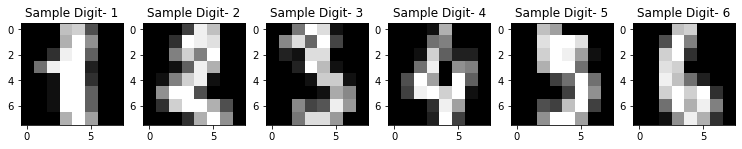

In [27]:
#Plot the imported digit image from 2 to 6
pyMatPlt.figure(figsize=(15,5))
for index, (image, label) in enumerate(zip(digitData.data[1:7], digitData.target[1:7])):
    pyMatPlt.subplot(1,7, index+1)
    pyMatPlt.imshow(np.reshape(image,(8,8)), cmap=pyMatPlt.cm.gray)
    pyMatPlt.title('Sample Digit- %i' %label)

In [28]:
# Import module for Data Partitioning using sklearn 
from sklearn.model_selection import train_test_split

In [29]:
# Train - Test Data Partition (80:20)
x_train, x_test, y_train, y_test= train_test_split(digitData.data, digitData.target, test_size=0.2, random_state=2)

In [31]:
# Evalue the shape of Train an Test data with X and Y 
print('Shape of x_train', x_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of x_test', x_test.shape)
print('Shape of y_test', y_test.shape)

Shape of x_train (1437, 64)
Shape of y_train (1437,)
Shape of x_test (360, 64)
Shape of y_test (360,)


# Perform Logistic Regression

In [32]:
# Import Logistic Regression Module
from sklearn.linear_model import LogisticRegression

In [33]:
# Create object of Imported Logistic Regression Class
myLogRegmodel= LogisticRegression()

In [39]:
# Train the Logistic Regression model using training set of data
myLogRegmodel.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Obtain the prediction for Test dataset
myPredict=myLogRegmodel.predict(x_test)

In [41]:
# Calculate the score of the model
modelScore=myLogRegmodel.score(x_test, y_test)
print('The score of Logistic regression Model is ', modelScore)

The score of Logistic regression Model is  0.9361111111111111


In [43]:
# Import metrics for better model evaluation
from sklearn import metrics

In [46]:
# Calculate the confusion Matrix to compare the predicted values against actual value
confusionMatrix=metrics.confusion_matrix(y_test,myPredict)
print(confusionMatrix)

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  1  0  0  0  0  1  1]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  3  2  0]
 [ 0  2  0  0 31  0  0  0  1  1]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  2  0  0  0  0  0  0 33  1]
 [ 0  0  0  1  0  1  0  1  3 22]]


In [47]:
# Import searborn for plotting heat map
import seaborn as sb

Text(0.5, 1, 'Confusion Matrix with Accuracy Score : 0.9361111111111111')

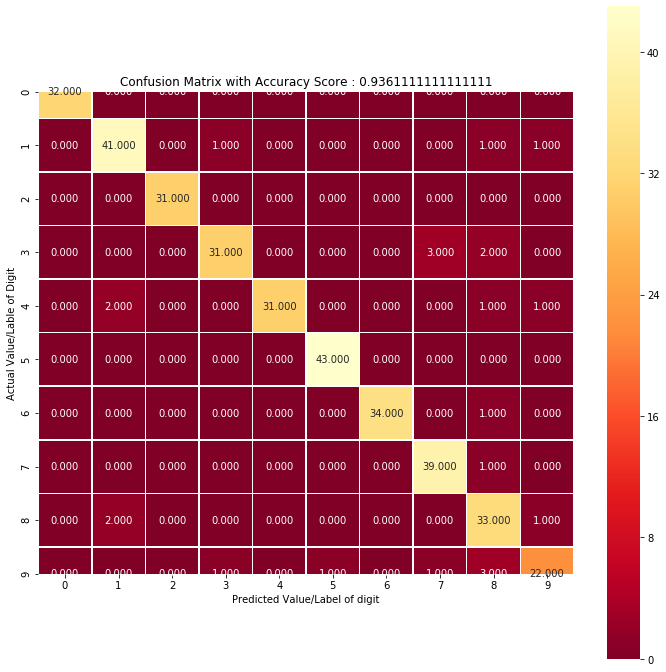

In [72]:
# Plot confusion matrix chart with accuracy using heatMap
matplt.figure(figsize=(12,12))
sb.heatmap(confusionMatrix, linewidths=.5, square=True, cmap='YlOrRd_r', fmt='.3f', annot=True);
matplt.xlabel("Predicted Value/Label of digit")
matplt.ylabel("Actual Value/Lable of Digit")
matplt.title("Confusion Matrix with Accuracy Score : {0}".format(modelScore))


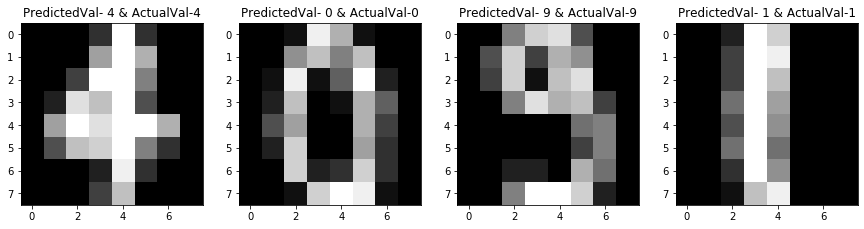

In [80]:
# Plot Actual and prediction for the digit images
index=0
IndexClass=[]
for predict, actual in zip(myPredict, y_test):
    if predict==actual:
        IndexClass.append(index)
    index=index+1
    
matplt.figure(figsize=(15,5))
for plotInd, Incorrect in enumerate(IndexClass[0:4]):
    pyMatPlt.subplot(1,4, plotInd+1)
    pyMatPlt.imshow(np.reshape(x_test[Incorrect],(8,8)), cmap=pyMatPlt.cm.gray)
    pyMatPlt.title('PredictedVal- {} & ActualVal-{}'.format(myPredict[Incorrect], y_test[Incorrect]))    